In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [67]:
df = pd.read_csv('C:/Users/aero1/Downloads/movie_metadata.csv')
df.head()

,color,director_name,num_critic_for_reviews,duration,gross,genres,actor_name,movie_title,num_voted_users,num_of_reviews,language,country,content_rating,budget,title_year,imdb_score,aspect_ratio
0,Color,James Cameron,723.0,178.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054.0,English,USA,PG-13,237000000.0,2009.0,7.9,1.78
1,Color,Gore Verbinski,302.0,169.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238.0,English,USA,PG-13,300000000.0,2007.0,7.1,2.35
2,Color,Sam Mendes,602.0,148.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994.0,English,UK,PG-13,245000000.0,2015.0,6.8,2.35
3,Color,Christopher Nolan,813.0,164.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701.0,English,USA,PG-13,250000000.0,2012.0,8.5,2.35
4,NaN,Doug Walker,NaN,NaN,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,NaN,NaN,NaN,NaN,NaN,NaN,7.1,NaN


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   color                   5024 non-null   object 
 1   director_name           4939 non-null   object 
 2   num_critic_for_reviews  4993 non-null   float64
 3   duration                5028 non-null   float64
 4   gross                   4159 non-null   float64
 5   genres                  5043 non-null   object 
 6   actor_name              5036 non-null   object 
 7   movie_title             5043 non-null   object 
 8   num_voted_users         5043 non-null   int64  
 9   num_of_reviews          5022 non-null   float64
 10  language                5031 non-null   object 
 11  country                 5038 non-null   object 
 12  content_rating          4740 non-null   object 
 13  budget                  4551 non-null   float64
 14  title_year              4935 non-null   

In [69]:
df.describe()

,num_critic_for_reviews,duration,gross,num_voted_users,num_of_reviews,budget,title_year,imdb_score,aspect_ratio
count,4993.000000,5028.000000,4.159000e+03,5.043000e+03,5022.000000,4.551000e+03,4935.000000,5043.000000,4714.000000
mean,140.194272,107.201074,4.846841e+07,8.366816e+04,272.770808,3.975262e+07,2002.470517,6.442138,2.220403
std,121.601675,25.197441,6.845299e+07,1.384853e+05,377.982886,2.061149e+08,12.474599,1.125116,1.385113
min,1.000000,7.000000,1.620000e+02,5.000000e+00,1.000000,2.180000e+02,1916.000000,1.600000,1.180000
25%,50.000000,93.000000,5.340988e+06,8.593500e+03,65.000000,6.000000e+06,1999.000000,5.800000,1.850000
50%,110.000000,103.000000,2.551750e+07,3.435900e+04,156.000000,2.000000e+07,2005.000000,6.600000,2.350000
75%,195.000000,118.000000,6.230944e+07,9.630900e+04,326.000000,4.500000e+07,2011.000000,7.200000,2.350000
max,813.000000,511.000000,7.605058e+08,1.689764e+06,5060.000000,1.221550e+10,2016.000000,9.500000,16.000000


In [70]:
df.isnull().sum()

color                      19
director_name             104
num_critic_for_reviews     50
duration                   15
gross                     884
genres                      0
actor_name                  7
movie_title                 0
num_voted_users             0
num_of_reviews             21
language                   12
country                     5
content_rating            303
budget                    492
title_year                108
imdb_score                  0
aspect_ratio              329
dtype: int64

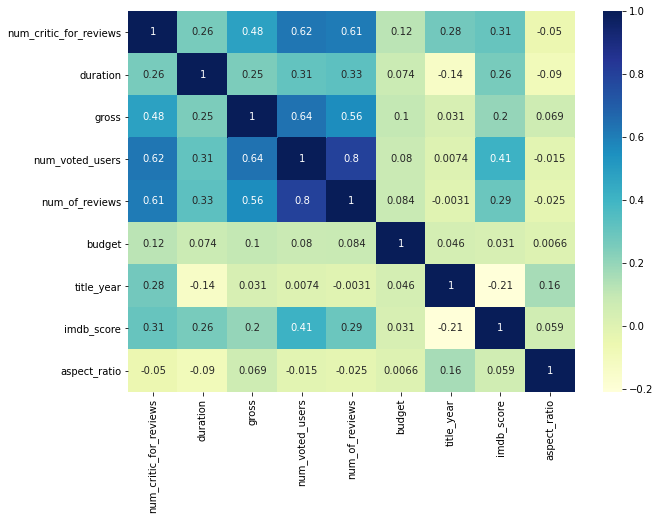

In [71]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True, cmap="YlGnBu")
plt.show()

In [72]:
cat = df.select_dtypes(object)
num = df.select_dtypes(np.number)

In [73]:
for i in df.columns:
    if i in cat.columns:
        df[i] = df[i].fillna(df[i].mode())
    else:
        df[i] = df[i].fillna(df[i].mean())

In [74]:
df.isnull().sum()

color                      19
director_name             104
num_critic_for_reviews      0
duration                    0
gross                       0
genres                      0
actor_name                  7
movie_title                 0
num_voted_users             0
num_of_reviews              0
language                   12
country                     5
content_rating            303
budget                      0
title_year                  0
imdb_score                  0
aspect_ratio                0
dtype: int64

In [75]:
df.dropna(inplace=True)

In [76]:
import warnings

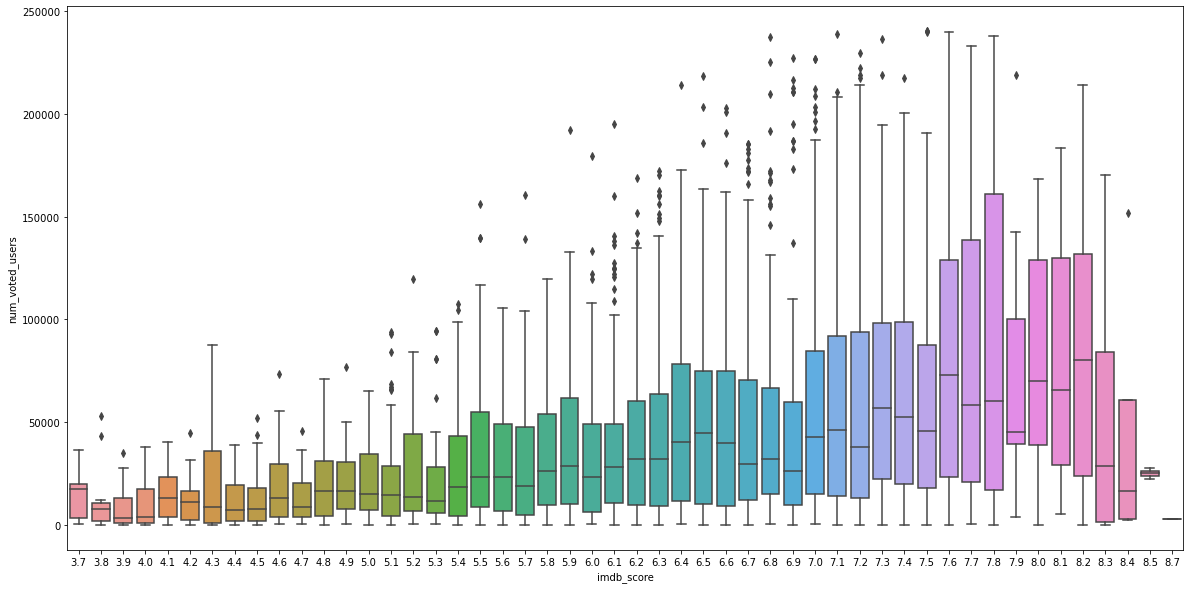

In [79]:
plt.figure(figsize=(20,10))
sns.boxplot(x='imdb_score',y='num_voted_users',data=df)
plt.show()

In [78]:
Q1 = df.quantile(.25)
Q3 = df.quantile(.75)
IQR = Q3-Q1
df = df[~((df<(Q1 - 1.5*IQR)) | (df>(Q3+1.5*IQR))).any(axis=1)]
df.head()

<ipython-input-78-67a147bbdcc9>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df<(Q1 - 1.5*IQR)) | (df>(Q3+1.5*IQR))).any(axis=1)]
<ipython-input-78-67a147bbdcc9>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df<(Q1 - 1.5*IQR)) | (df>(Q3+1.5*IQR))).any(axis=1)]


,color,director_name,num_critic_for_reviews,duration,gross,genres,actor_name,movie_title,num_voted_users,num_of_reviews,language,country,content_rating,budget,title_year,imdb_score,aspect_ratio
55,Color,Peter Sohn,298.0,93.0,1.230703e+08,Adventure|Animation|Comedy|Family|Fantasy,A.J. Buckley,The Good Dinosaur,62836,345.0,English,USA,PG,3.975262e+07,2015.0,6.8,2.350000
84,Color,Roland Joffé,10.0,109.0,4.846841e+07,Action|Adventure|Romance|Sci-Fi,Tamsin Egerton,The Lovers,2138,15.0,English,Belgium,R,3.975262e+07,2015.0,4.5,2.220403
214,Color,Paul Verhoeven,196.0,113.0,1.194129e+08,Action|Sci-Fi,Ronny Cox,Total Recall,240241,391.0,English,USA,R,6.500000e+07,1990.0,7.5,1.850000
215,Color,John McTiernan,85.0,102.0,3.269479e+07,Action|Adventure|History,Tony Curran,The 13th Warrior,101411,546.0,English,USA,R,8.500000e+07,1999.0,6.6,2.350000
281,Color,Peter Chelsom,62.0,104.0,6.712451e+06,Comedy|Romance,Del Zamora,Town & Country,4102,89.0,English,New Line,R,9.000000e+07,2001.0,4.4,1.850000


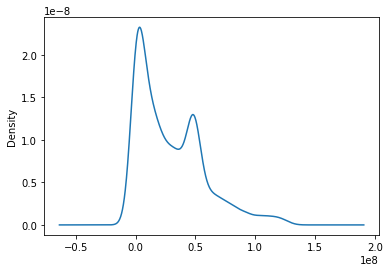

In [80]:
df.gross.plot(kind='kde')
plt.show()

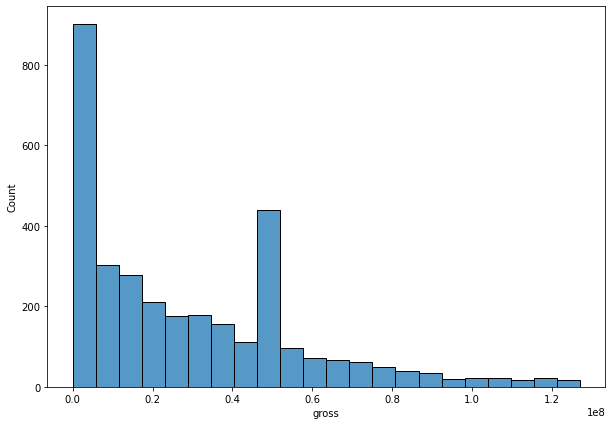

In [81]:
plt.figure(figsize=(10,7))
sns.histplot(df.gross)
plt.show()

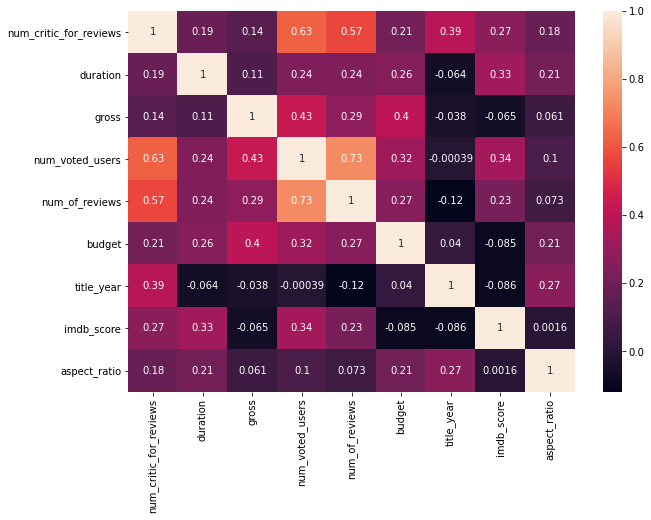

In [82]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [83]:
df = df.sample(300)

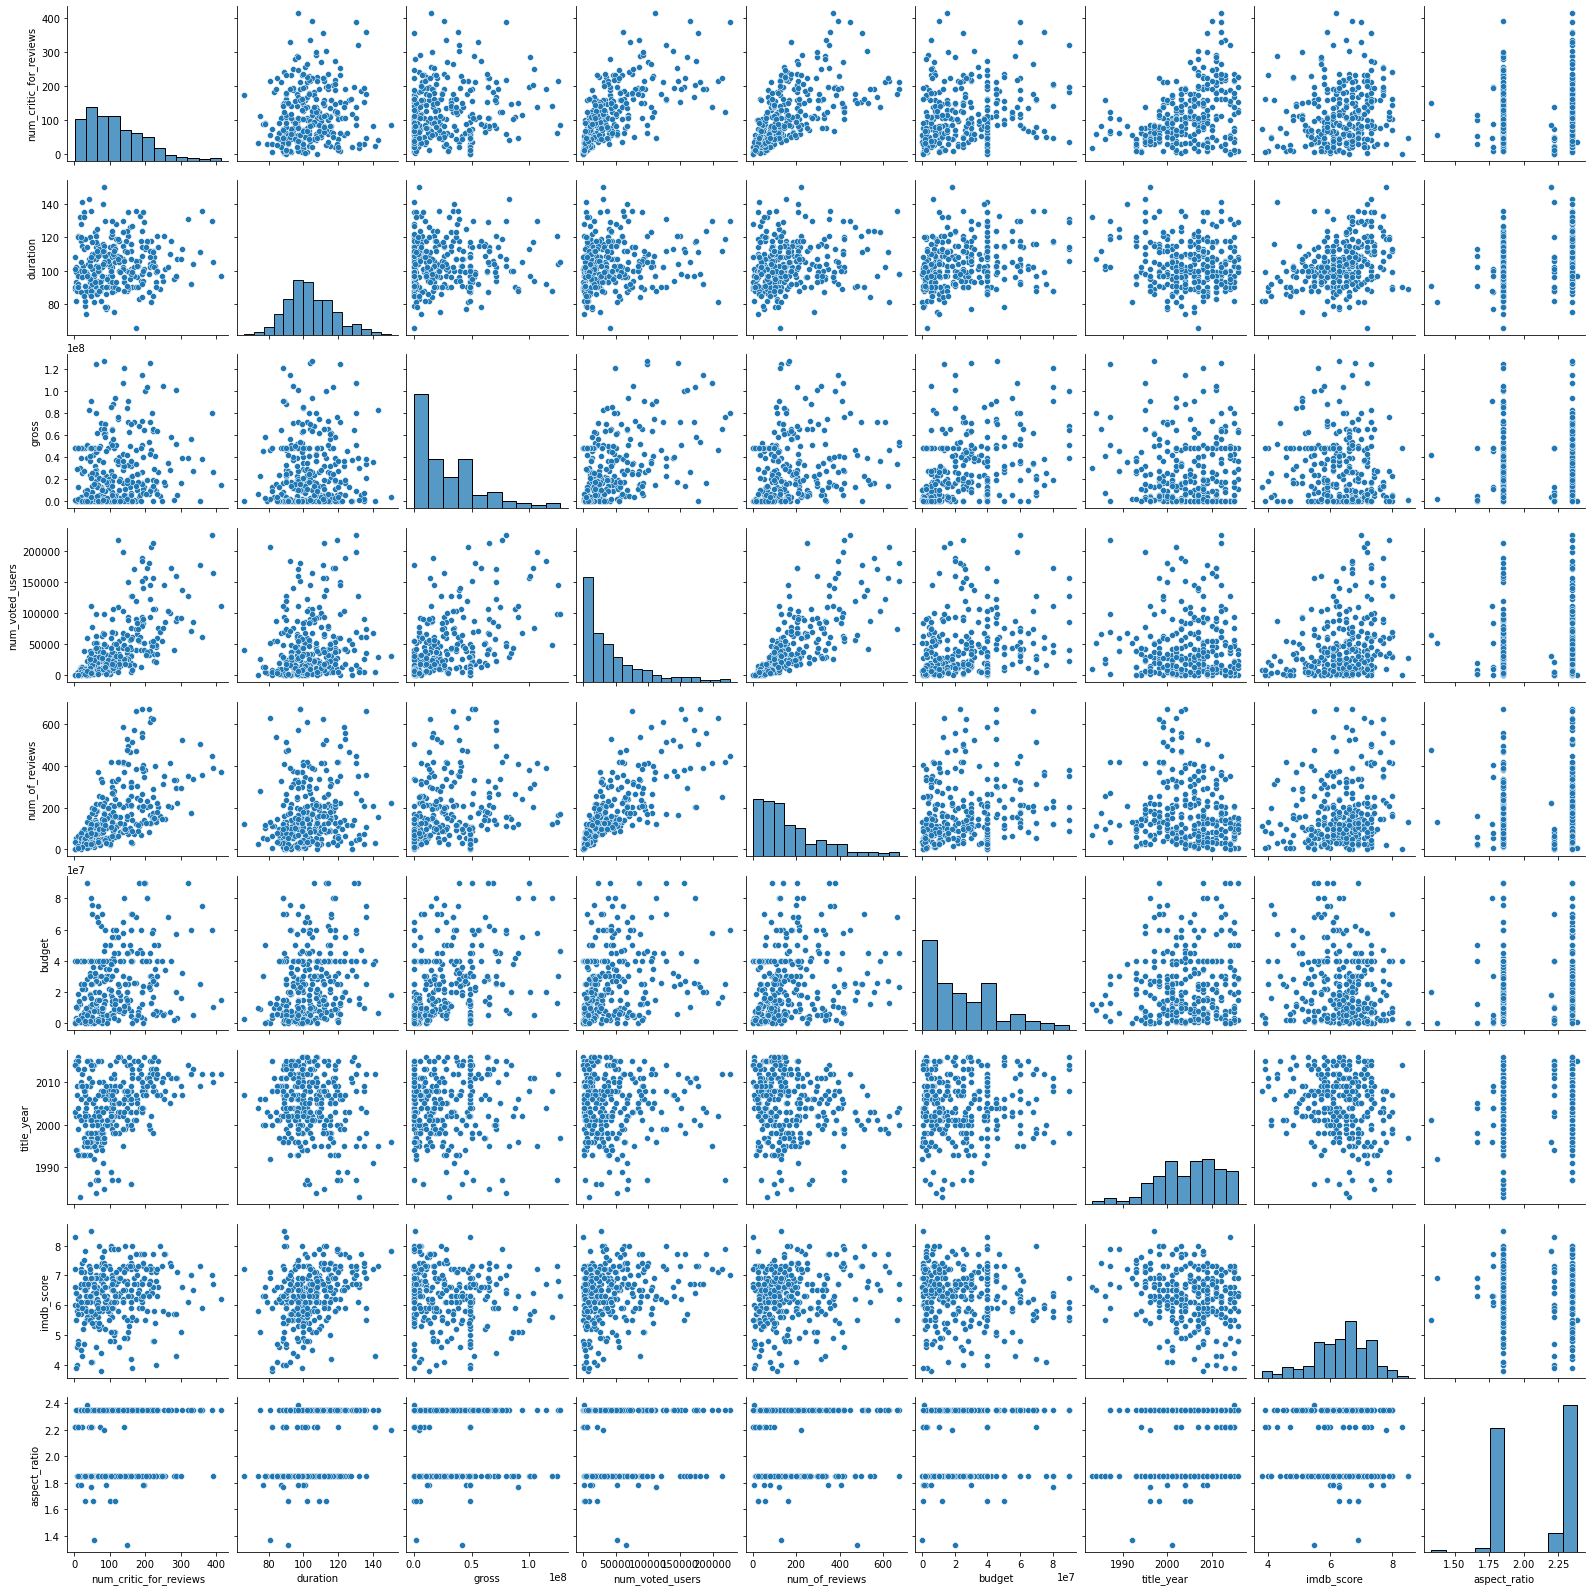

In [84]:
sns.pairplot(df)
plt.show()

C:\Users\aero1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


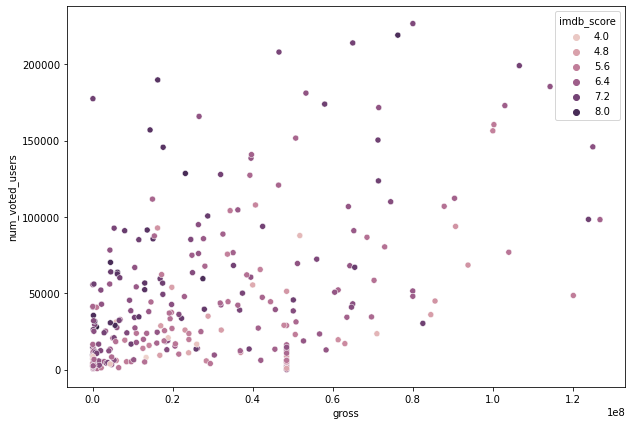

In [85]:
plt.figure(figsize=(10,7))
sns.scatterplot(df.gross,df.num_voted_users,hue=df['imdb_score'])
plt.show()

<Figure size 720x504 with 0 Axes>

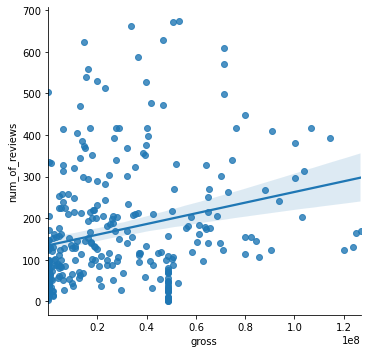

In [86]:
plt.figure(figsize=(10,7))
sns.lmplot(x='gross',y='num_of_reviews',data=df)
plt.show()

C:\Users\aero1\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


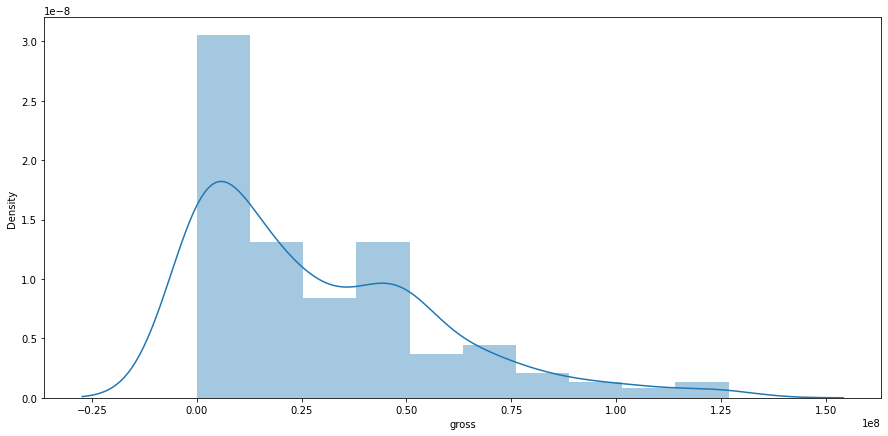

In [88]:
plt.figure(figsize=(15,7))
sns.distplot(df.gross)
plt.show()

<Figure size 1080x504 with 0 Axes>

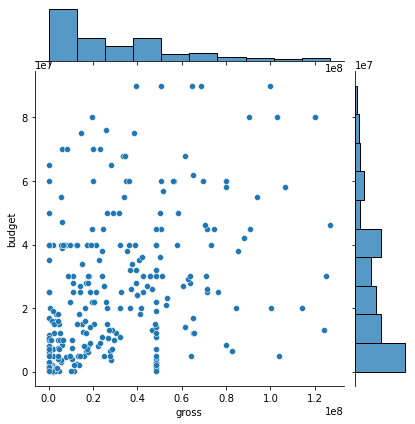

In [87]:
plt.figure(figsize=(15,7))
sns.jointplot(x='gross',y='budget',data=df)
plt.show()